#### Data Science Project - Machine Leaning.

Capstone: 
Y = (Predicted) Diabetes 
X = (Multiple Factors) 


ML Algorithms = Will be focusing on supervised (multiple linear regression) numeric values.

####### Data provided by https://data.cdc.gov/
Dataset Files:  Diabetes.cvs
Data Measure: 500 Cities: Diagnosed diabetes among adults aged >=18 years








In [14]:

# importing the libraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math 
%metplotlib inline #


UsageError: Line magic function `%metplotlib` not found.


In [29]:
# Reading, loading  datasets. 

df_CA_Diabetes = pd.read_csv("CA_Diabetes_PopulationByCityCounty.csv")
df_CA_Diabetes.drop(df_CA_Diabetes.filter(regex="Unnamed"), axis=1, inplace=True)

In [30]:
df_CA_Diabetes

,City_Name,Daig12Month,Diag9Moths,Daig6Month,Daig3Month,EstPopByCountyCity,DaigYrlyRate,CrudeRate100K
0,CA Redondo Beach,44499,33374.25,22249.5,11124.75,69781,0.64,2.2
1,CA Milpitas,44504,33378.00,22252.0,11126.00,79066,0.56,2.2
2,CA Manteca,44731,33548.25,22365.5,11182.75,85792,0.52,2.2
3,CA Perris,45575,34181.25,22787.5,11393.75,79835,0.57,2.3
4,CA Turlock,45699,34274.25,22849.5,11424.75,72682,0.63,2.3
...,...,...,...,...,...,...,...,...
116,CA Fresno,328467,246350.25,164233.5,82116.75,542107,0.61,16.4
117,CA San Francisco,530655,397991.25,265327.5,132663.75,3313000,0.16,26.5
118,CA San Jose,621842,466381.50,310921.0,155460.50,983489,0.63,31.1
119,CA San Diego,859037,644277.75,429518.5,214759.25,1381611,0.62,43.0


In [31]:
df_CA_Diabetes.count()

City_Name             121
Daig12Month           121
Diag9Moths            121
Daig6Month            121
Daig3Month            121
EstPopByCountyCity    121
DaigYrlyRate          121
CrudeRate100K         121
dtype: int64

In [48]:
df_CA_Diabetes.shape

(121, 8)

In [32]:
df_CA_Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City_Name           121 non-null    object 
 1   Daig12Month         121 non-null    int64  
 2   Diag9Moths          121 non-null    float64
 3   Daig6Month          121 non-null    float64
 4   Daig3Month          121 non-null    float64
 5   EstPopByCountyCity  121 non-null    int64  
 6   DaigYrlyRate        121 non-null    float64
 7   CrudeRate100K       121 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 7.7+ KB


Run statistic on the dataset

In [33]:
#df_CA_Diabetes_Filter = df_CA_Diabetes.drop(columns=["AvgDaigPerYrRate", "CrudeRate100K",])
#f_CA_Diabetes_Filter

In [36]:
df_CA_Diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Daig12Month,121.0,121760.107438,235140.903605,44499.00,55271.00,69095.00,102010.00,2397632.00
Diag9Moths,121.0,91320.080579,176355.677704,33374.25,41453.25,51821.25,76507.50,1798224.00
Daig6Month,121.0,60880.053719,117570.451803,22249.50,27635.50,34547.50,51005.00,1198816.00
Daig3Month,121.0,30440.026860,58785.225901,11124.75,13817.75,17273.75,25502.50,599408.00
EstPopByCountyCity,121.0,230746.611570,501878.928394,65505.00,88255.00,109925.00,170488.00,3849297.00
DaigYrlyRate,121.0,0.615785,0.078579,0.14,0.60,0.63,0.66,0.73
CrudeRate100K,121.0,6.087603,11.759695,2.20,2.80,3.50,5.10,119.90


In [ ]:
# View the summary by heatmap

sns.set_style('white')
plt.figure(figsize=(4,4))
x = df_CA_Diabetes.iloc[:, :0].values
y = df_CA_Diabetes.iloc[:, 1:7].values
sns.heatmap(df_CA_Diabetes.corr(), square=True, annot=True )

C:\Users\dolly\AppData\Local\Temp\ipykernel_24520\2678215914.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df_CA_Diabetes.corr()[['EstPopByCountyCity']].sort_values('EstPopByCountyCity', ascending=False),


<Axes: >

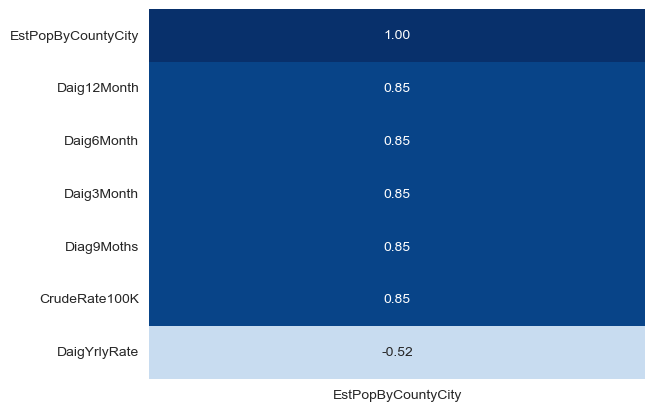

In [88]:
sns.heatmap(data=df_CA_Diabetes.corr()[['EstPopByCountyCity']].sort_values('EstPopByCountyCity', ascending=False), 
            annot=True, cmap='Blues', vmin=-1.0, vmax=1.0, cbar=False, fmt='.2f')

In [42]:
df_CA_Diabetes.columns

Index(['City_Name', 'Daig12Month', 'Diag9Moths', 'Daig6Month', 'Daig3Month',
       'EstPopByCountyCity', 'DaigYrlyRate', 'CrudeRate100K'],
      dtype='object')

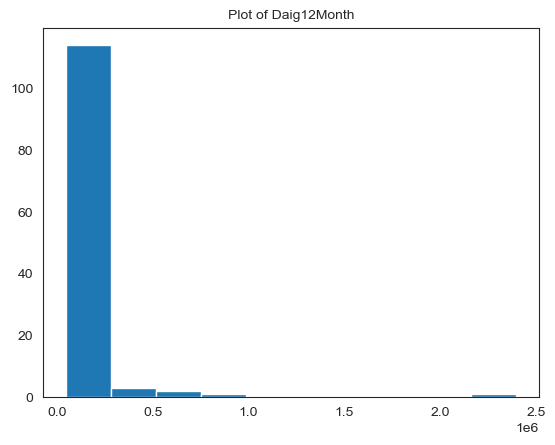

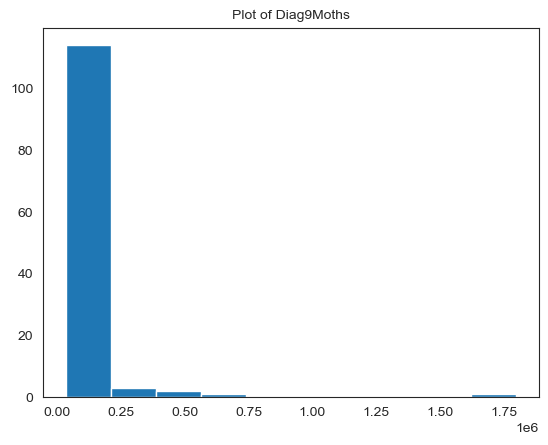

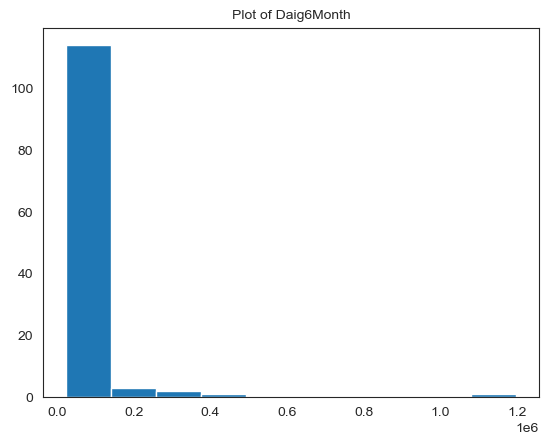

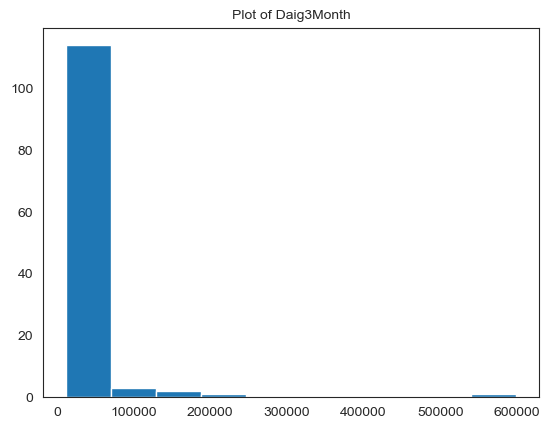

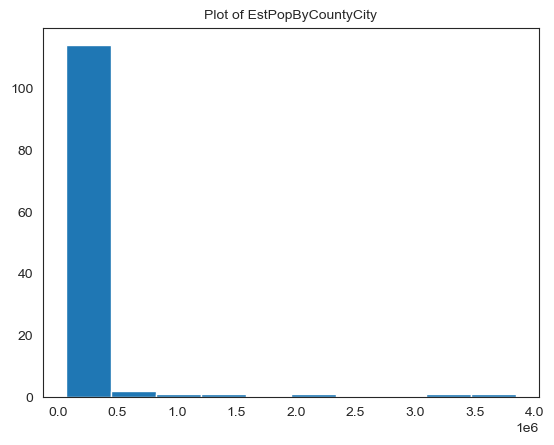

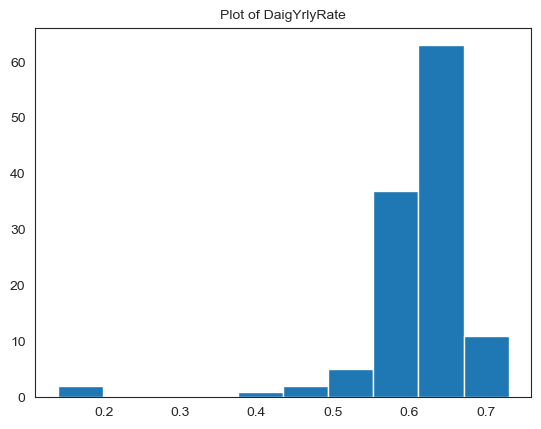

In [47]:
for c in (df_CA_Diabetes.columns[1:7]):
    plt.title("Plot of "+c,fontsize=10)
    plt.hist(df_CA_Diabetes[c],bins=10)
    plt.show()

In [69]:
df_CA_Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City_Name           121 non-null    object 
 1   Daig12Month         121 non-null    int64  
 2   Diag9Moths          121 non-null    float64
 3   Daig6Month          121 non-null    float64
 4   Daig3Month          121 non-null    float64
 5   EstPopByCountyCity  121 non-null    int64  
 6   DaigYrlyRate        121 non-null    float64
 7   CrudeRate100K       121 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 7.7+ KB


In [66]:

df_CA_Diabetes.sort_values(["EstPopByCountyCity"])
#df_CA_Diabetes.sort_values(["City_Name","EstPopByCountyCity"], ascending=[1,0])
#df_CA_Diabetes

,City_Name,Daig12Month,Diag9Moths,Daig6Month,Daig3Month,EstPopByCountyCity,DaigYrlyRate,CrudeRate100K
8,CA Lynwood,46515,34886.25,23257.5,11628.75,65505,0.71,2.3
0,CA Redondo Beach,44499,33374.25,22249.5,11124.75,69781,0.64,2.2
7,CA Union City,46344,34758.00,23172.0,11586.00,70460,0.66,2.3
16,CA Baldwin Park,50260,37695.00,25130.0,12565.00,70629,0.71,2.5
4,CA Turlock,45699,34274.25,22849.5,11424.75,72682,0.63,2.3
...,...,...,...,...,...,...,...,...
118,CA San Jose,621842,466381.50,310921.0,155460.50,983489,0.63,31.1
119,CA San Diego,859037,644277.75,429518.5,214759.25,1381611,0.62,43.0
115,CA Sacramento,309260,231945.00,154630.0,77315.00,2215000,0.14,15.5
117,CA San Francisco,530655,397991.25,265327.5,132663.75,3313000,0.16,26.5


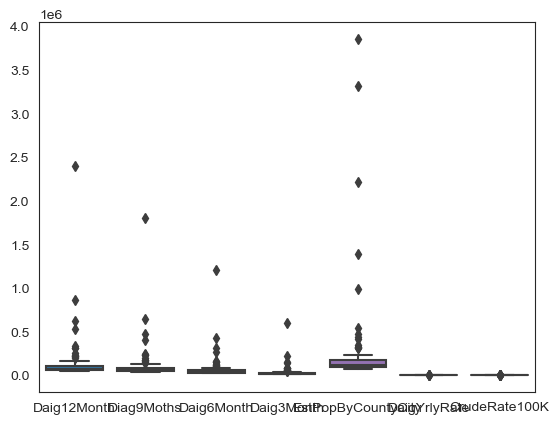

In [86]:
# When comparing values the data type must be the same.
#Xample:                            
#ax = sns.boxplot(data=housing.query('sqft_living < 8000 and price < 1000000 and price > 0'), x = 'floors',y = 'price')

#ax = sns.boxplot(data=df_CA_Diabetes.query('Daig3Month >= 11628.75  and  EstPopByCountyCity >= 69781'), x = 'EstPopByCountyCity', y = 'Daig3Month' )
ax = sns.boxplot(data=df_CA_Diabetes.query('Daig12Month >= 46515  and Diag9Moths >= 34886.25 '))


Create linear regression modles to predict the values/or death rate. 